In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score,roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
train_data= pd.read_csv('/content/Train_data.csv')
train_data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
test_data = pd.read_csv("/content/Test_data.csv")
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [ ]:
train_data.shape

(25192, 42)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train_data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


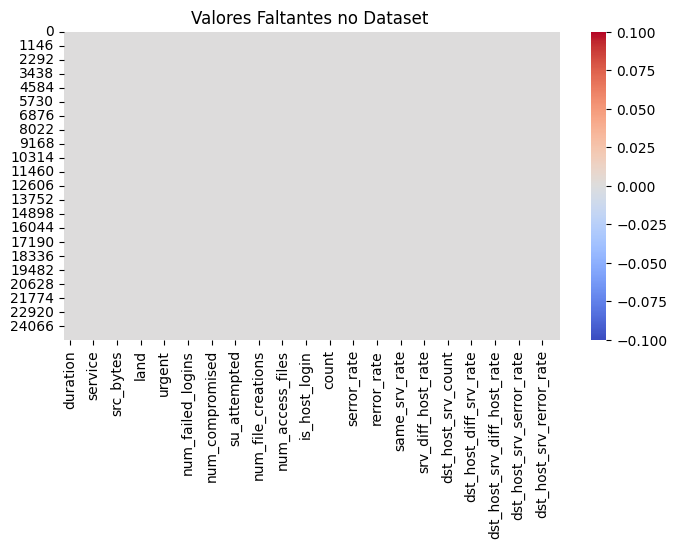

In [ ]:
plt.figure(figsize=(8, 4))  # Define o tamanho da figura
sns.heatmap(train_data.isnull(), cbar=True, cmap='coolwarm')
plt.title("Valores Faltantes no Dataset ")  # Adiciona um título
plt.show()

In [ ]:
train_data['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


<Axes: xlabel='class'>

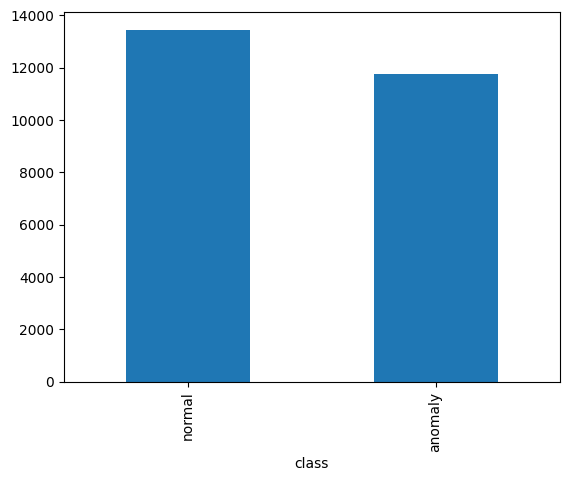

In [ ]:
train_data['class'].value_counts().plot(kind='bar')

In [ ]:
train_data['class'].value_counts()
print(train_data['class'].value_counts())
print()

train_data['class'] = (train_data['class'] == 'anomaly').astype(int)
print(train_data['class'].value_counts())

class
normal     13449
anomaly    11743
Name: count, dtype: int64

class
0    13449
1    11743
Name: count, dtype: int64


In [ ]:
cat_features = train_data.select_dtypes(include=['object']).columns.tolist()
num_features = train_data.select_dtypes(include=['int64','float64']).columns.tolist()

if 'class' in num_features:

    num_features.remove('class')

if 'class' in cat_features:
    cat_features.remove('class')

In [ ]:

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown="ignore")


preprocessador = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
    ]
)

In [ ]:
X = train_data.iloc[:, :-1]
y = train_data.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model_params = {
    'knn': {
        'model':  KNeighborsClassifier(),
        'params': {
            'model__n_neighbors': [3, 5, 7, 9, 11],
        'model__weights': ['uniform', 'distance'],
        'model__metric': ['minkowski', 'euclidean', 'manhattan']
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(max_iter=500),
        'params': {
            'model__C': [0.1, 1, 10]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'model__n_estimators': [25, 50, 75],
            'model__max_depth': list(range(1, 41)),
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    }
}

In [ ]:
metrics_results = []
roc_curves = {}
trained_pipelines = {}


for model_name, mp in model_params.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessador),
        ('model', mp['model'])  # Usando diretamente o modelo, sem GridSearch
    ])

    pipeline.fit(X_train, y_train)
    trained_pipelines[model_name] = pipeline
    # Predições
    y_pred = pipeline.predict(X_test)

    # Ajusta y_test para binário se ainda não estiver
    if y_test.ndim > 1:
        y_test = y_test.argmax(axis=1)

    # Obter probabilidades para ROC AUC, se possível
    if hasattr(pipeline.named_steps['model'], "predict_proba"):
        y_pred_proba = pipeline.predict_proba(X_test)
        if len(np.unique(y_test)) == 2:
            roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        else:
            roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    else:
        y_pred_proba = pipeline.decision_function(X_test)
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

    # Métricas
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Curva ROC
    if len(np.unique(y_test)) == 2:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
        roc_curves[model_name] = (fpr, tpr, roc_auc)

    # Armazenar
    metrics_results.append({
        'model': model_name,
        'precision': precision,
        'recall': recall,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'conf_matrix': conf_matrix
    })

    print(f"Modelo: {model_name}")
    print(f"Precisão: {precision:.2f}")
    print(f"Sensibilidade (Recall): {recall:.2f}")
    print(f"Acurácia: {accuracy:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print("Matriz de Confusão:")
    print(conf_matrix)
    print("-" * 40)

Modelo: knn
Precisão: 0.99
Sensibilidade (Recall): 0.99
Acurácia: 0.99
ROC AUC: 1.00
Matriz de Confusão:
[[4015   27]
 [  29 3487]]
----------------------------------------
Modelo: logistic_regression
Precisão: 0.98
Sensibilidade (Recall): 0.98
Acurácia: 0.98
ROC AUC: 1.00
Matriz de Confusão:
[[3967   75]
 [ 113 3403]]
----------------------------------------
Modelo: random_forest
Precisão: 1.00
Sensibilidade (Recall): 1.00
Acurácia: 1.00
ROC AUC: 1.00
Matriz de Confusão:
[[4037    5]
 [  11 3505]]
----------------------------------------


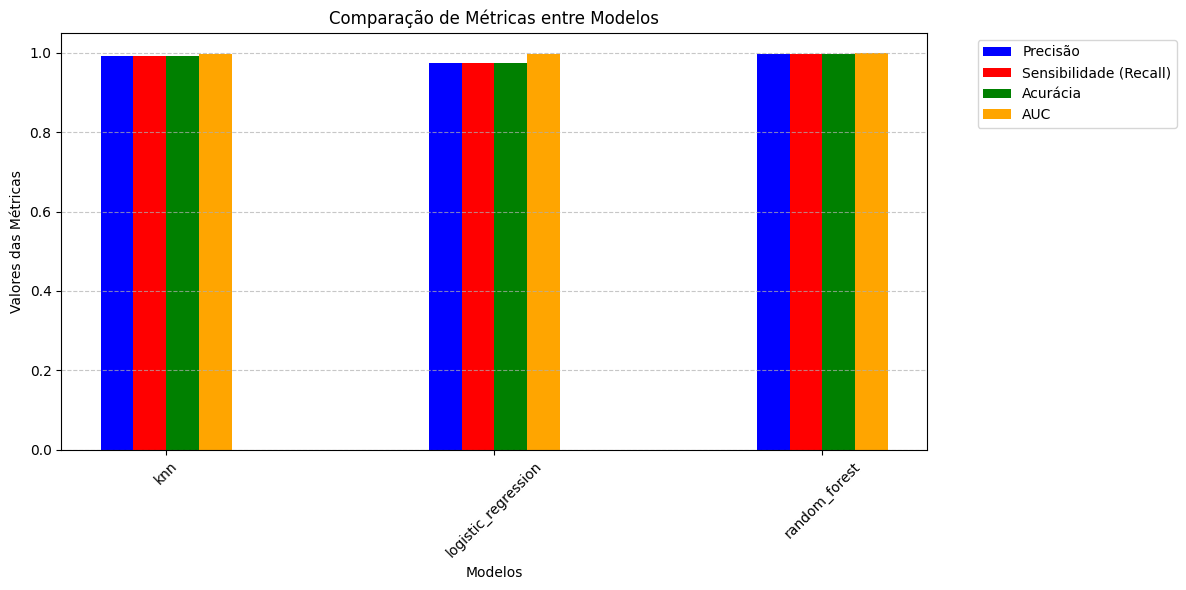

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Converter os resultados das métricas em arrays para facilitar os plots
model_names = [result['model'] for result in metrics_results]
precision_values = [result['precision'] for result in metrics_results]
recall_values = [result['recall'] for result in metrics_results]
accuracy_values = [result['accuracy'] for result in metrics_results]
roc_auc_values = [result['roc_auc'] for result in metrics_results]

# Criar um gráfico de barras comparativo
x = np.arange(len(model_names))  # Índices para os modelos
width = 0.1  # Largura das barras

plt.figure(figsize=(12, 6))

# Adicionando barras para cada métrica
plt.bar(x - 1.5 * width, precision_values, width, label='Precisão', color='blue')
plt.bar(x - 0.5 * width, recall_values, width, label='Sensibilidade (Recall)', color='red')
plt.bar(x + 0.5 * width, accuracy_values, width, label='Acurácia', color='green')
plt.bar(x + 1.5 * width, roc_auc_values, width, label='AUC', color='orange')

# Configurações do gráfico
plt.xticks(x, model_names, rotation=45)
plt.xlabel('Modelos')
plt.ylabel('Valores das Métricas')
plt.title('Comparação de Métricas entre Modelos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Posição da legenda fora do gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


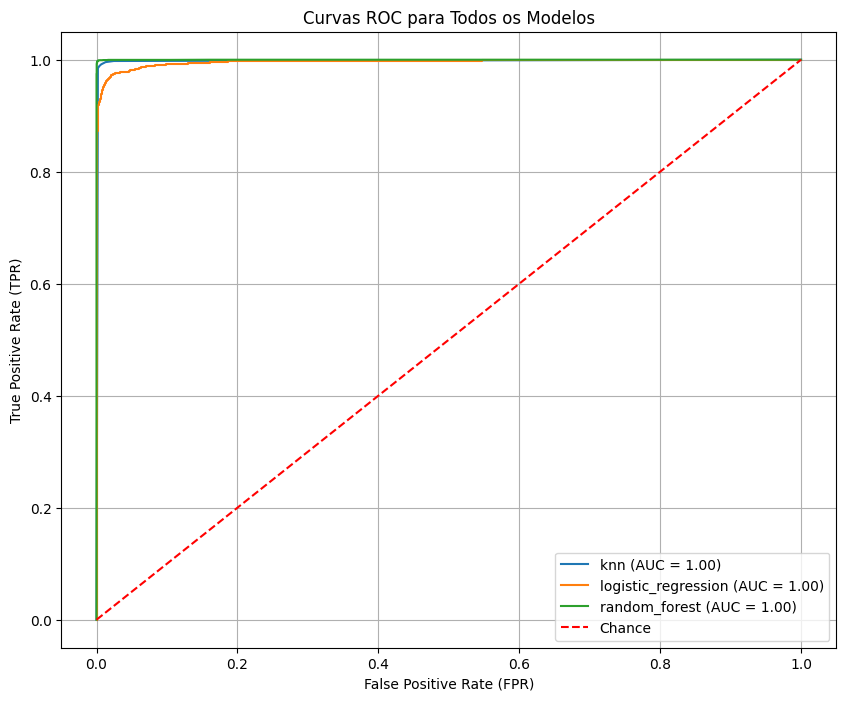

In [ ]:
# Curvas ROC para todos os modelos
plt.figure(figsize=(10, 8))

for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Linha de referência para um classificador aleatório
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Chance')

# Configurações do gráfico
plt.title('Curvas ROC para Todos os Modelos')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


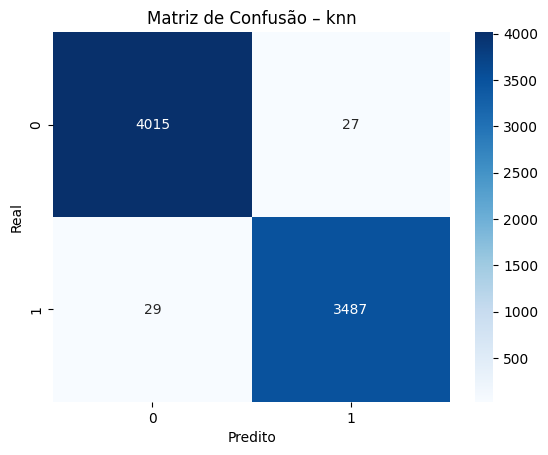

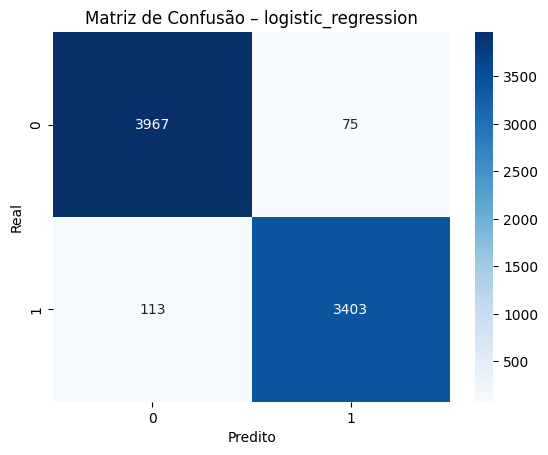

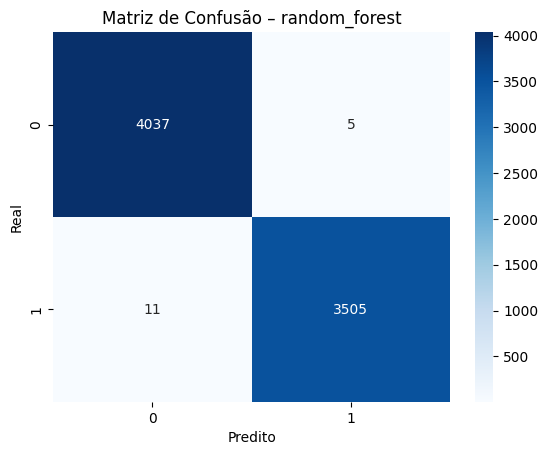

In [ ]:
from sklearn.metrics import confusion_matrix

# Para cada modelo, calcula e plota a matriz de confusão
for name, pipeline in trained_pipelines.items():
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão – {name}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()







In [ ]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [ ]:
predicoes = {}

for modelo_nome, modelo in trained_pipelines.items():
    y_pred = modelo.predict(test_data)
    predicoes[modelo_nome] = ['Normal' if val == 0 else 'Anomalia' for val in y_pred]

df_resultado = pd.DataFrame(predicoes)

print("Previsões para os Dados de Teste:")
display(df_resultado.head())

Previsões para os Dados de Teste:


,knn,logistic_regression,random_forest
0,Anomalia,Anomalia,Anomalia
1,Anomalia,Anomalia,Anomalia
2,Normal,Normal,Normal
3,Anomalia,Anomalia,Anomalia
4,Normal,Normal,Normal
